In [1]:
### Visualization of Figure 3B and S6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycirclize import Circos
from io import StringIO
from matplotlib.patches import Patch
import pycountry
import pycirclize.utils
import openpyxl
from Bio import Phylo
from pycirclize.utils import load_example_image_file
import matplotlib.lines as mlines
from matplotlib import rcParams

In [3]:
# Load the Excel file
attrativeness_countries = pd.ExcelFile('data/attrativeness_countries.xlsx')

# Get all sheet names
sheet_names = attrativeness_countries.sheet_names

In [6]:
continentDict = {}
for sheet_name in sheet_names:
    for jj in list(attrativeness_countries.parse(sheet_name).columns[1:]):
        continentDict[jj] = sheet_name

In [8]:

level_distance = pd.ExcelFile('data/level_distance.xlsx')

# Get all sheet names
sheet_names = level_distance.sheet_names

dfList = []
for sheet_name in sheet_names:
    df = level_distance.parse(sheet_name)
    df.columns = ['cohort','Problevel0','Problevel1','Problevel2','Problevel3']
    cohortmapDict = dict(zip(df['cohort'],list(range(0,12))))
    df['Homecountry'] = sheet_name
    df['Continent'] = continentDict[sheet_name]
    df['cohort'] = list(range(0,12))
    dfList.append(df)

In [19]:
cohortYearDict = dict(zip(
    list(range(0,12)),['60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','00-04','05-09','10-14','15-21']
))

In [10]:
AllResult = pd.concat(dfList).reset_index(drop = True)
AllResult.head()

,cohort,Problevel0,Problevel1,Problevel2,Problevel3,Homecountry,Continent
0,0,0.293413,0.391218,0.051896,0.263473,GB,EU
1,1,0.239583,0.377315,0.074074,0.309028,GB,EU
2,2,0.265646,0.338881,0.085220,0.310253,GB,EU
3,3,0.284201,0.321712,0.106355,0.287732,GB,EU
4,4,0.291447,0.334212,0.109549,0.264792,GB,EU


In [61]:
cohort = 11


In [62]:
colorDict = {1:'#bdc9e1', 2:'#74a9cf', 3:'#2b8cbe', 4: '#045a8d'}

In [63]:
figszieAll = (15,4)
markersize = 20
linewidth = 3.5
legend_fontsize = 20
legend_markersize = 10
legend_linewidth = 3
legend_height = 40
legend_width = 60

In [64]:
Draw1 = AllResult[AllResult.cohort==cohort].groupby(['Homecountry']).agg({
    'Problevel0':'mean',
    'Problevel1':'mean',
    'Problevel2':'mean',
    'Problevel3':'mean',
}).reset_index()
Draw1['continent'] = Draw1['Homecountry'].map(continentDict)

Draw = pd.melt(Draw1, id_vars=['Homecountry'], value_vars=['Problevel0','Problevel1','Problevel2','Problevel3']).reset_index(drop = True)
Draw['leveldist'] = Draw['variable'].map({
    'Problevel0':0,
    'Problevel1':1,
    'Problevel2':2,
    'Problevel3':3
})

Draw['continent'] = Draw['Homecountry'].map(continentDict)

sorted_df = Draw1.sort_values('continent')

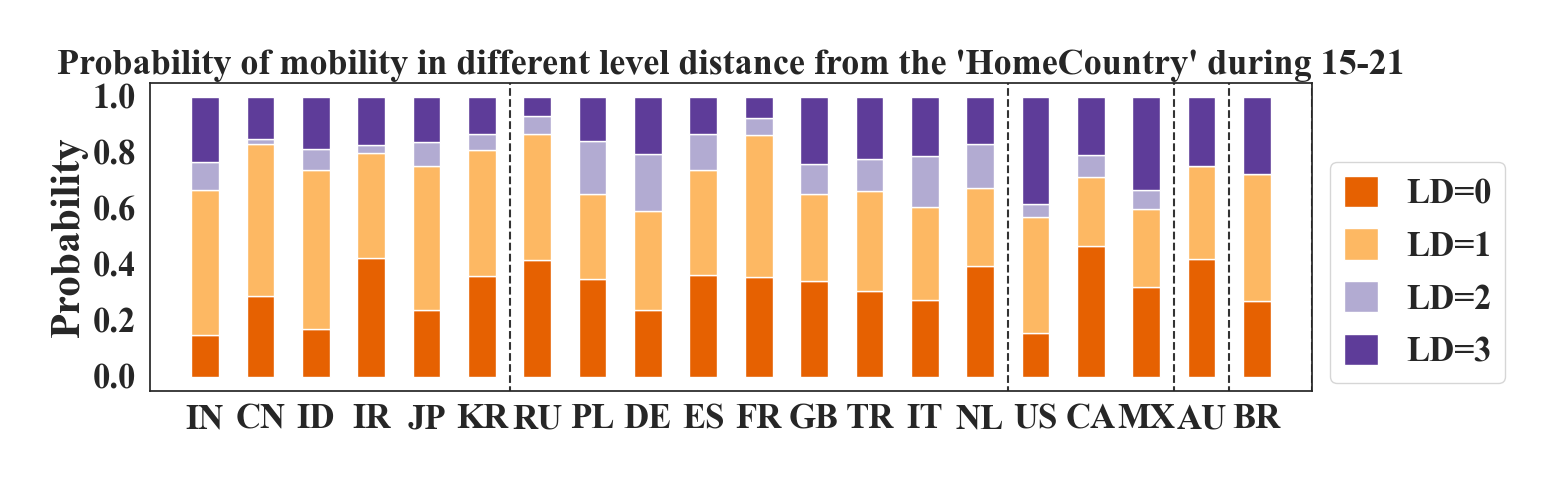

In [65]:

barwidth = 0.5
alphaset = 0.8


cololist = ['#fc4e2a','#f768a1','#78c679','#fe9929','#1d91c0']
sns.set_theme(style='white')
plt.figure(figsize= figszieAll , dpi=100)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']  # 可以具体替换
# data = list(Draw1[Draw1.continent == continent][['Homecountry','Problevel0','Problevel1','Problevel2','Problevel3']].apply(lambda x: list(x),axis = 1))
data = list(sorted_df[['Homecountry','Problevel0','Problevel1','Problevel2','Problevel3']].apply(lambda x: list(x),axis = 1))
FieldLength = np.cumsum(list(sorted_df.continent.value_counts().reset_index().sort_values('index').continent))
countries = [d[0] for d in data]
values1 = [d[1] for d in data]
values2 = [d[2] for d in data]
values3 = [d[3] for d in data]
values4 = [d[4] for d in data]
plt.ylim(-.05, 1.05)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],fontsize = 25, weight ='bold')

plt.ylabel('Probability', fontsize = 30, weight = 'bold')
plt.xticks(fontsize = 25, weight ='bold')
plt.xlabel('')
palette={ 0:'#e66101',
          1:'#fdb863',
          2:'#b2abd2',
          3:'#5e3c99',
                }

plt.xlim(-1,20)
plt.bar(countries, values1, width = barwidth, color = palette[0])
plt.bar(countries, values2, bottom=values1, width = barwidth, color = palette[1])
plt.bar(countries, values3,
        bottom=[i+j for i,j in zip(values1, values2)], width = barwidth, color = palette[2])
plt.bar(countries,
        values4,
        bottom=[i+j+k for i,j,k in zip(values1 , values2 , values3)], width = barwidth, color = palette[3])

plt.legend(['LD=0', 'LD=1', 'LD=2', 'LD=3'],loc = 'upper left', prop = {'weight':'bold', 'size':25}, bbox_to_anchor=(1, 0.8), frameon = True)
plt.title('Probability', fontsize = 30, weight = 'bold')


plt.vlines(ymin = -0.1, ymax = 1.2, x = 0+FieldLength[0]-0.5,alpha = alphaset, linestyles='--')

plt.vlines(ymin = -0.1, ymax = 1.2, x = FieldLength[1]-0.5,alpha = alphaset, linestyles='--')

plt.vlines(ymin = -0.1, ymax = 1.2, x = FieldLength[2]-0.5,alpha = alphaset, linestyles='--')

plt.vlines(ymin = -0.1, ymax = 1.2, x = FieldLength[3]-0.5,alpha = alphaset, linestyles='--')

plt.vlines(ymin = -0.1, ymax = 1.2, x = FieldLength[4],alpha = alphaset, linestyles='--')


plt.title("Probability of mobility in different level distance from the 'HomeCountry' during "+str(cohortYearDict[cohort]), fontsize = 26, weight = 'bold')


plt.show()